# Midterm Presentation - The Oscars Demographics' Exploration
INFO 5871-001
Fall 2019

_Keke Wu_

### Imports

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### Load the data

In [2]:
oscars_original = pd.read_csv('Oscars-demographics-DFE.csv', encoding = "ISO-8859-1", parse_dates=True)
for col in oscars_original.columns: 
    print(col) 

_unit_id
_golden
_unit_state
_trusted_judgments
_last_judgment_at
birthplace
birthplace:confidence
date_of_birth
date_of_birth:confidence
race_ethnicity
race_ethnicity:confidence
religion
religion:confidence
sexual_orientation
sexual_orientation:confidence
year_of_award
year_of_award:confidence
award
biourl
birthplace_gold
date_of_birth_gold
movie
person
race_ethnicity_gold
religion_gold
sexual_orientation_gold
year_of_award_gold


In [3]:
oscars_original.shape

(441, 27)

### Data Preparation

#### _Construct a new dataframe that contains only columns of interest_
#### _Remove the duplicated rows: 1. sort by name 2. remove if movie repeated_

In [4]:
oscars = pd.DataFrame(oscars_original, columns=['_golden', 'birthplace', 'race_ethnicity' , 'date_of_birth', 'year_of_award', 'award', 'movie', 'person'])
oscars.sort_values("person", inplace = True) 

In [5]:
oscars.drop_duplicates(subset ='movie', keep = 'last', inplace = True)

In [6]:
oscars

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person
151,False,"East Harlem, New York City",White,25-Apr-40,1993,Best Actor,Scent of a Woman,Al Pacino
243,False,"Brooklyn, Ny",White,26-Mar-34,2007,Best Supporting Actor,Little Miss Sunshine,Alan Arkin
339,False,New York City,White,2-Nov-1892,1938,Best Supporting Actress,In Old Chicago,Alice Brady
79,False,"Pingtung, Taiwan",Asian,23-Oct-54,2006,Best Director,Brokeback Mountain,Ang Lee
86,False,"Pingtung, Taiwan",Asian,23-Oct-54,2013,Best Director,Life of Pi,Ang Lee
421,False,"Los Angeles, Ca",White,4-Jun-75,2000,Best Supporting Actress,"Girl, Interrupted",Angelina Jolie
387,False,"Santa Monica, Ca",White,8-Jul-51,1986,Best Supporting Actress,Prizzi's Honor,Anjelica Huston
278,False,"Rome, Italy",White,7-Mar-08,1956,Best Actress,The Rose Tattoo,Anna Magnani
348,False,"Michigan City, In",White,7-May-23,1947,Best Supporting Actress,The Razor's Edge,Anne Baxter
414,False,"Brooklyn, Ny",White,12-Nov-82,2013,Best Supporting Actress,Les MisÌ©rables,Anne Hathaway


### Q1: Univariate - Race & Ethinicity

#### _* Oscars winners distribution by race & ethnicity_
#### _* Plot with a pie chart_

In [15]:
race_counts = oscars.race_ethnicity.value_counts()
race_counts

White          314
Black           13
Hispanic         5
Asian            3
Multiracial      1
Name: race_ethnicity, dtype: int64

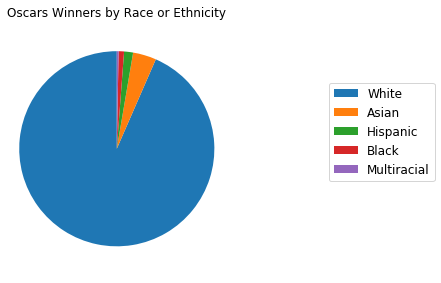

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
race_dict = dict.fromkeys(oscars.race_ethnicity)
labels = list(race_dict)
sizes = list(race_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="right", fontsize=12, bbox_transform=plt.gcf().transFigure)
plt.title('Oscars Winners by Race or Ethnicity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5)
plt.show()
fig1.savefig("oscar_winner_race.pdf");

### Q1: Univariate - Award

#### _* Oscars winners distribution by award category_
#### _* Combine the actress & supporting actress, actor & supporting actor_
#### _* Compute the possibility of winning both Oscars and Golden Globe Award_

In [9]:
oscars.award.value_counts()

Best Actress               75
Best Director              70
Best Actor                 69
Best Supporting Actress    62
Best Supporting Actor      60
Name: award, dtype: int64

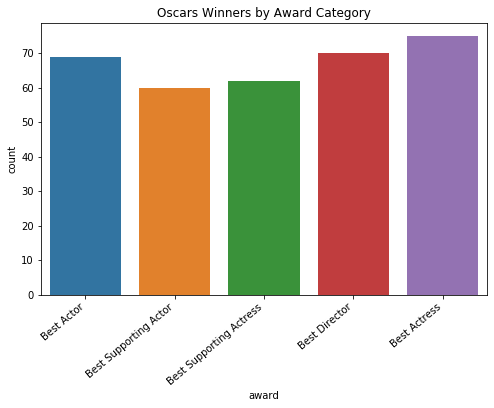

In [10]:
p = plt.figure(figsize=(8,5))
plt.title('Oscars Winners by Award Category')
ax = sns.countplot(oscars.award);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
p.savefig("oscar_winner_category.pdf");

In [11]:
oscars['award_combined'] = 'Best Director'
female_filter = oscars.award.str.contains('Actress')
oscars.loc[female_filter, 'award_combined'] = 'Best Actress'
male_filter = oscars.award.str.contains('Actor')
oscars.loc[male_filter, 'award_combined'] = 'Best Actor'

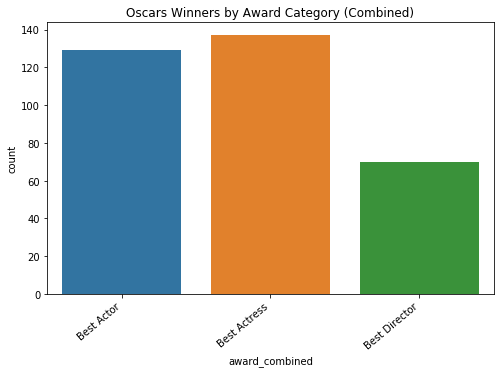

In [12]:
p = plt.figure(figsize=(8,5))
plt.title('Oscars Winners by Award Category (Combined)')
ax = sns.countplot(oscars.award_combined);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
p.savefig("oscar_winner_category(combined).pdf");

In [13]:
golden_global = oscars[oscars._golden == True].copy()
golden_oscar = len(golden_global) / len(oscars)
print("The chance of winning both the Oscars and the Golden Globe Award is" + " {:.2%}".format(golden_oscar));

The chance of winning both the Oscars and the Golden Globe Award is 1.49%


### Q2: Bivariate - Where are most Oscars winners from?

#### _* Plot the trending birth places with a word cloud_

In [14]:
from wordcloud import WordCloud
text = str(oscars['birthplace'])
wordcloud = WordCloud(width=1000, height=500, max_words=30, colormap="Blues").generate(text)
p = plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
p.savefig("oscar_winner.pdf")

ModuleNotFoundError: No module named 'wordcloud'

### Q2: Bivariate - Which month were most Oscars winners born in?

#### _* Oscars winners by the month they were born_

In [ ]:
oscars['month'] = pd.DatetimeIndex(oscars['date_of_birth']).month
sns.catplot(x="month", kind='count', palette="ch:.10", data=oscars);

In [ ]:
apr = oscars.loc[oscars['month'] == 4]
apr.shape

In [ ]:
oscars.loc[oscars['person'].str.contains('Tom Hanks')]